In [89]:
import sys
import matplotlib.pyplot as plt
import numpy as np    
import ROOT
import root_numpy as rtnp

import cygnus_lib as cy
import mylib as my
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
from itertools import combinations
import math
import os
import time


from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
myhost = os.uname()[1]
if myhost == 'macmazzitelli.lnf.infn.it':
    mybasepath = '/Users/mazzitel/Dropbox/GR2/soft/data/'
    posix=False
else:
    mybasepath = '/workarea/cloud-storage/mazzitel/'
    posix=True
print("Host:", myhost)
print (sys.version, get_ipython())
if 'google.colab' in str(get_ipython()) and sys.version[0:1] in '2':
    mybasepath = './'
    posix=False
    print('Running on CoLab')

Host: f788a0b0dfb1
3.6.8 (default, Nov 16 2020, 16:55:22) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-44)] <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f65d8b710f0>


In [2]:
def Gauss3(x, a0, x0, s0):
    import numpy as np
    return a0 * np.exp(-(x - x0)**2 / (2 * s0**2))
    
def histGaus(var, bins, ax, color='b', xrange=False, alpha=1, label=''):
    from sklearn.metrics import r2_score
    from scipy.stats import chisquare
    import scipy.stats as stats
    if xrange:
        ax.hist(var, bins=bins, label=label, color=color, range=(xrange[0], xrange[1]), alpha=alpha)
        y, bins_edge = np.histogram(var, bins=bins, range=(xrange[0], xrange[1]))
    else:
        ax.hist(var, bins=bins, label=label, color=color)
        y, bins_edge = np.histogram(var, bins=bins)
    p0=[y.max(),bins_edge[y.argmax()], var.std()]
    x = np.linspace(bins_edge[0], bins_edge[-1], bins)
    popt, pcov = curve_fit(Gauss3, x, y, p0=p0)
    perr = np.sqrt(np.diag(pcov))
    r2=r2_score(y, Gauss3(x, *popt))
    x = np.linspace(bins_edge[0], bins_edge[-1], 100)
    sstat='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
    \nc = {4:.2f} +/- {5:.2f}\n$R^2$ = {6:.4f}'.format(popt[0], perr[0], popt[1], perr[1], 
                                                popt[2], perr[2], r2)
    ax.plot(x,Gauss3(x, *popt), color+'--', label=sstat)
    return ax
def ExpG(x, p0, p1, a0, x0, s0): # power of ten
    import numpy as np
    return p0*np.exp(p1*x) + a0 * np.exp(-(x - x0)**2 / (2 * s0**2))

def Exp(x, p0, p1): # power of ten
    import numpy as np
    return p0*np.exp(p1*x)

def G3(x, a0, x0, s0): # power of ten
    import numpy as np
    return a0 * np.exp(-(x - x0)**2 / (2 * s0**2))

def myExpG(data,ax, xmin, xmax, bins, E0, E1, a0, x0, s0):
    y = data[(data > xmin) & (data < xmax)]
    binsf = int(bins*((xmax-xmin)/(y.max()-y.min())))
    x=np.linspace(xmin , xmax, binsf)
    yh, _ = np.histogram(y, bins=binsf, range=(xmin,xmax))
    popt, pcov = curve_fit(ExpG, x, yh, 
                            p0=(E0, E1, a0, x0, s0))    
    #print ("Params: ", popt) 
    perr = np.sqrt(np.diag(pcov))
    #print ("err: ", perr)
    # plt.title(r'E0*$e^{(E1*x)}$ + a0*$e^{-\frac{(x - x0)^2}{2*s0^2}}$', fontsize=30)
    ax.plot(x, ExpG(x, *popt), 'r--', linewidth=2,
    label='E0 = %.2e +/- %.2e\nE1 = %.2e +/- %.2e\na0 = %.2e +/- %.2e\nx0 = %.2e +/- %.2e\ns0 = %.2e +/- %.2e' % 
                          (popt[0], perr[0],  popt[1],perr[1],
                           popt[2],perr[2], popt[3], perr[3], popt[4], perr[4]))
    ax.plot(x, G3(x, popt[2], popt[3], popt[4]), 'b-', label='signal')
    ax.plot(x, Exp(x, popt[0], popt[1]), 'y-', label='background')
    return ax




rascale:  4
/workarea/cloud-storage/mazzitel/ped/run4038_mean.h5 /workarea/cloud-storage/mazzitel/ped/run4038_sigma.h5
>>> Pedestal Maker! <<<
Open file: https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygnus/Data/LAB/histograms_Run04038.root
Find Keys: 200
# of Images (TH2) Files: 200 
# of Waveform (TH2) Files: 0 
Camera X, Y pixel: 2304 2304 
Debug Image[200,200]: 10 => 97.00 4.55 100.09 
Debug Image[200,200]: 20 => 109.00 4.76 101.67 
Debug Image[200,200]: 30 => 99.00 4.78 101.03 
Debug Image[200,200]: 40 => 100.00 4.60 101.20 
Debug Image[200,200]: 50 => 95.00 4.72 100.96 
Debug Image[200,200]: 60 => 99.00 4.60 100.90 
Debug Image[200,200]: 70 => 107.00 4.45 101.07 
Debug Image[200,200]: 80 => 107.00 4.33 100.81 
Debug Image[200,200]: 90 => 105.00 4.24 100.84 
Debug Image[200,200]: 100 => 97.00 4.08 100.86 
Debug Image[200,200]: 110 => 98.00 3.99 100.79 
Debug Image[200,200]: 120 => 100.00 3.87 100.70 
Debug Image[200,200]: 130 => 102.00 3.87 100.82 
Debug Image[

/s3/mazzitel/cygno_cloud/cygnus_lib.py:1194: RuntimeWarning: invalid value encountered in sqrt
  s_image = np.sqrt((s_image - m_image**2 * n0) / (n0 - 1))


sigma 3.747079
DONE OUTPUT on files: %s, %s ('/workarea/cloud-storage/mazzitel/ped/run4038_mean.h5', '/workarea/cloud-storage/mazzitel/ped/run4038_sigma.h5')
light over Th: 29440469.83 
Open file: /workarea/cloud-storage/cygnus/Data/LAB/histograms_Run04039.root
Find Keys: 200
# of Images (TH2) Files: 200 
# of Waveform (TH2) Files: 0 
Camera X, Y pixel: 2304 2304 
>>>> Processing RUN:  4039 Event:  0
DEBUG: number of points, clusters: 1720 73
Elapsed time: 13.0
['iTr: 0.00', 'cluster_lable: 73.00', 'pixels: 173.00', 'photons: 1612.67', 'ph_pixels: 9.32', 'x0start: 1184.00', 'y0start: 1952.00', 'x0end: 1188.00', 'y0end: 1960.00', 'width: 20.55', 'height: 15.18', 'pearson: 0.29']


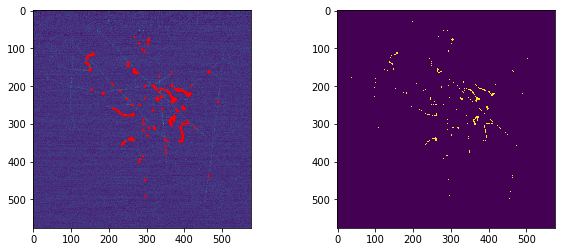

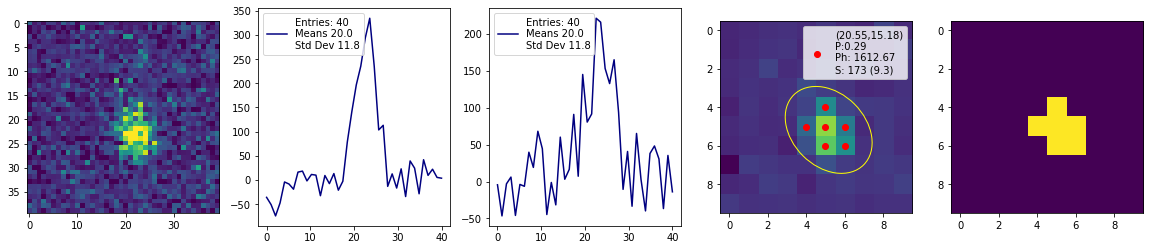

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered i

>>>> Processing RUN:  4039 Event:  10


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 734 54
Elapsed time: 200.3
['iTr: 10.00', 'cluster_lable: 54.00', 'pixels: 624.00', 'photons: 3651.01', 'ph_pixels: 5.85', 'x0start: 1300.00', 'y0start: 2040.00', 'x0end: 1304.00', 'y0end: 2064.00', 'width: 27.11', 'height: 39.47', 'pearson: -0.05']


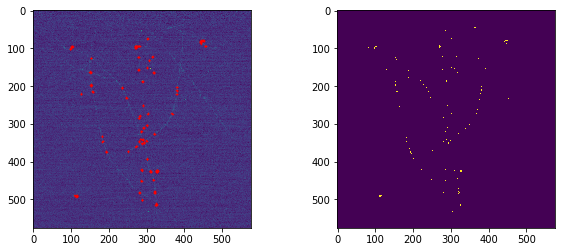

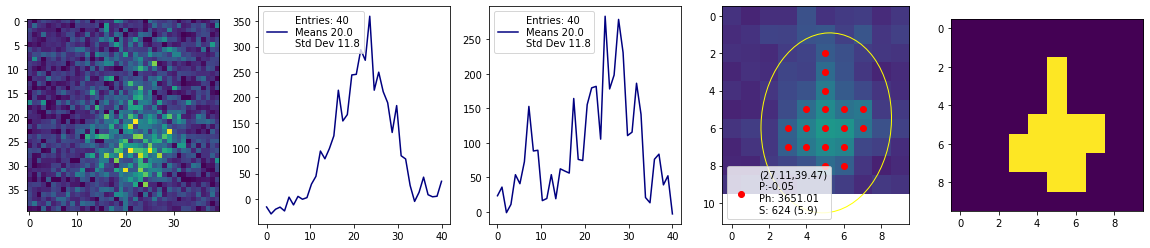

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])


>>>> Processing RUN:  4039 Event:  20


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 1142 67
Elapsed time: 166.0
['iTr: 20.00', 'cluster_lable: 67.00', 'pixels: 172.00', 'photons: 1371.50', 'ph_pixels: 7.97', 'x0start: 1140.00', 'y0start: 2068.00', 'x0end: 1144.00', 'y0end: 2076.00', 'width: 13.15', 'height: 21.47', 'pearson: 0.00']


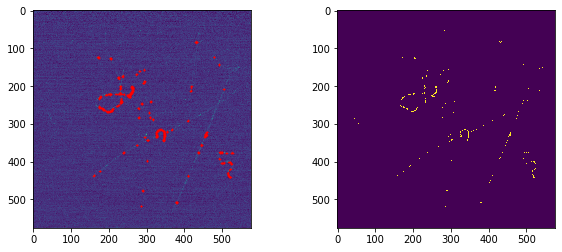

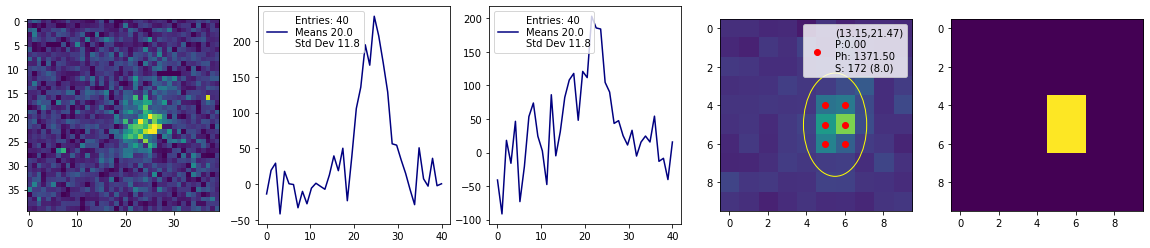

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: inval

>>>> Processing RUN:  4039 Event:  30


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 1886 87
Elapsed time: 196.3
['iTr: 30.00', 'cluster_lable: 87.00', 'pixels: 143.00', 'photons: 1300.40', 'ph_pixels: 9.09', 'x0start: 1188.00', 'y0start: 1968.00', 'x0end: 1192.00', 'y0end: 1976.00', 'width: 15.14', 'height: 16.47', 'pearson: 0.33']


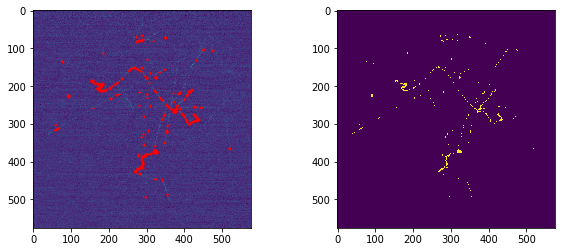

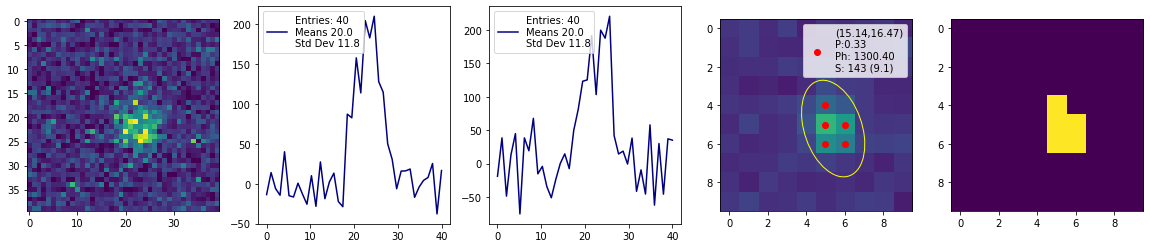

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: inva

>>>> Processing RUN:  4039 Event:  40


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 779 46
Elapsed time: 167.4
['iTr: 40.00', 'cluster_lable: 46.00', 'pixels: 141.00', 'photons: 1218.31', 'ph_pixels: 8.64', 'x0start: 1124.00', 'y0start: 1916.00', 'x0end: 1132.00', 'y0end: 1920.00', 'width: 23.13', 'height: 10.78', 'pearson: 0.33']


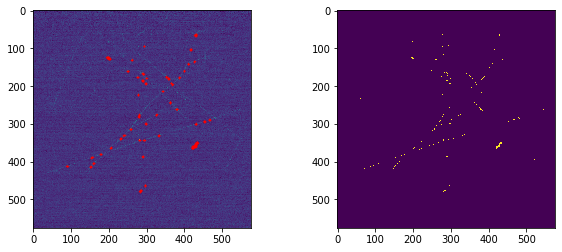

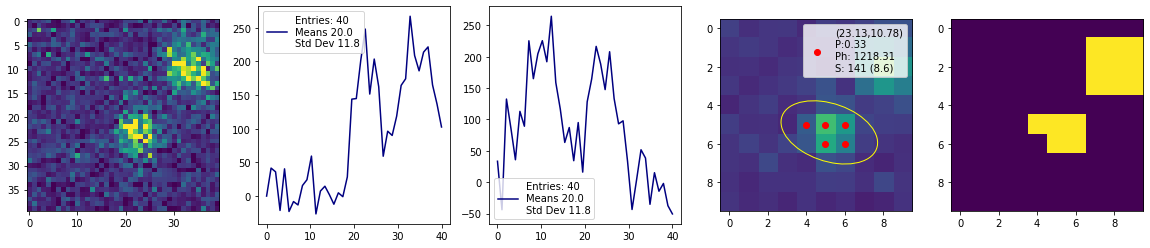

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


>>>> Processing RUN:  4039 Event:  50


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 940 59
Elapsed time: 208.1
['iTr: 50.00', 'cluster_lable: 59.00', 'pixels: 261.00', 'photons: 1400.44', 'ph_pixels: 5.37', 'x0start: 1924.00', 'y0start: 2136.00', 'x0end: 1920.00', 'y0end: 2144.00', 'width: 17.76', 'height: 24.60', 'pearson: -0.70']


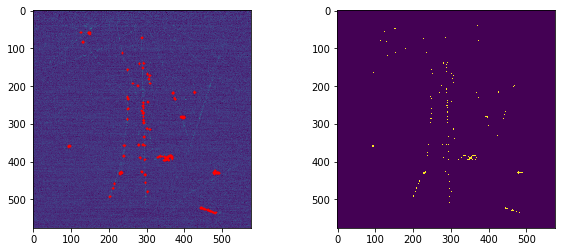

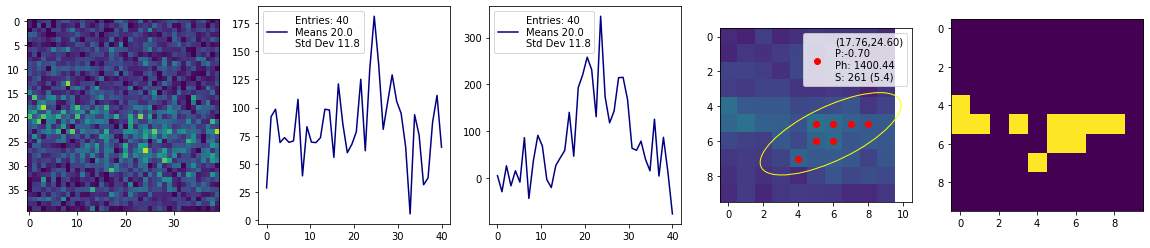

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_

>>>> Processing RUN:  4039 Event:  60


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 1053 59
Elapsed time: 176.1
['iTr: 60.00', 'cluster_lable: 59.00', 'pixels: 243.00', 'photons: 2063.74', 'ph_pixels: 8.49', 'x0start: 1140.00', 'y0start: 1828.00', 'x0end: 1140.00', 'y0end: 1840.00', 'width: 18.14', 'height: 22.22', 'pearson: 0.00']


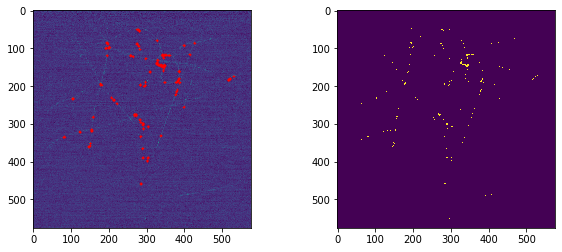

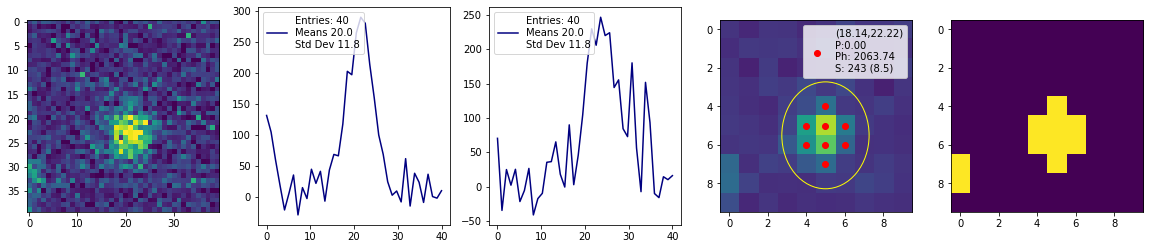

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


>>>> Processing RUN:  4039 Event:  70


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 1391 77
Elapsed time: 192.9
['iTr: 70.00', 'cluster_lable: 77.00', 'pixels: 319.00', 'photons: 1754.47', 'ph_pixels: 5.50', 'x0start: 504.00', 'y0start: 2148.00', 'x0end: 516.00', 'y0end: 2160.00', 'width: 33.99', 'height: 16.06', 'pearson: 0.58']


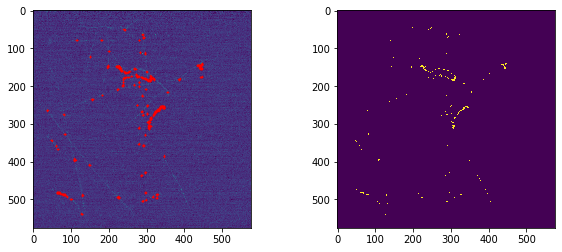

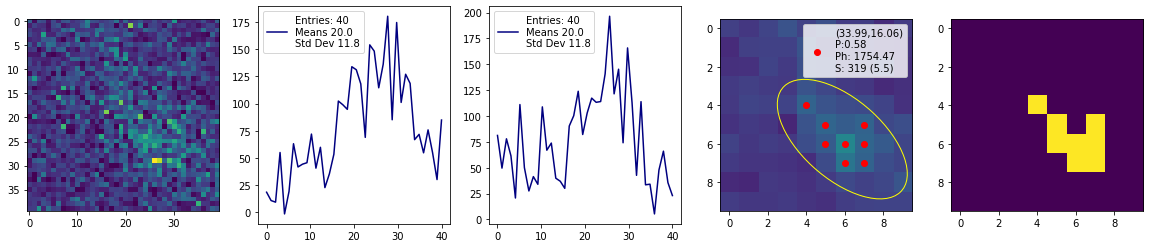

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launche

>>>> Processing RUN:  4039 Event:  80


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 1966 86
Elapsed time: 164.8
['iTr: 80.00', 'cluster_lable: 86.00', 'pixels: 391.00', 'photons: 2435.47', 'ph_pixels: 6.23', 'x0start: 1664.00', 'y0start: 2096.00', 'x0end: 1664.00', 'y0end: 2112.00', 'width: 22.54', 'height: 29.46', 'pearson: -0.11']


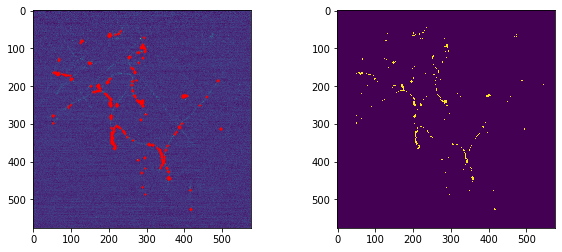

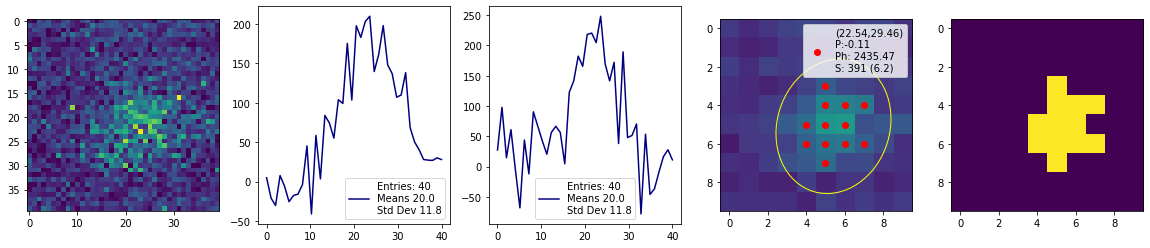

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: inval

>>>> Processing RUN:  4039 Event:  90


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 571 29
Elapsed time: 156.3
['iTr: 90.00', 'cluster_lable: 29.00', 'pixels: 193.00', 'photons: 1196.52', 'ph_pixels: 6.20', 'x0start: 1172.00', 'y0start: 2132.00', 'x0end: 1180.00', 'y0end: 2140.00', 'width: 24.00', 'height: 13.86', 'pearson: 0.50']


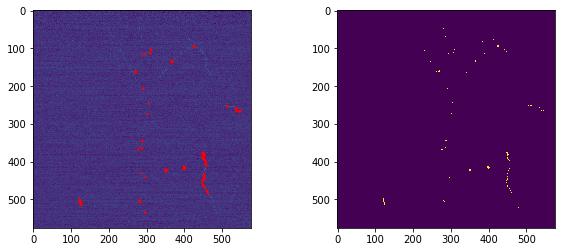

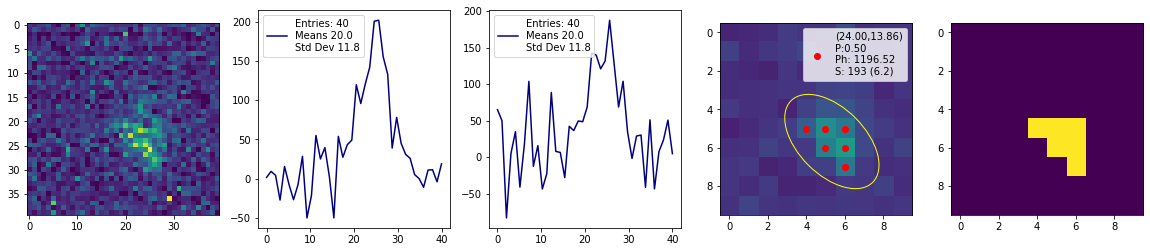

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


>>>> Processing RUN:  4039 Event:  100


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])


DEBUG: number of points, clusters: 823 51
Elapsed time: 217.1
['iTr: 100.00', 'cluster_lable: 51.00', 'pixels: 172.00', 'photons: 1474.07', 'ph_pixels: 8.57', 'x0start: 1176.00', 'y0start: 2012.00', 'x0end: 1180.00', 'y0end: 2020.00', 'width: 13.15', 'height: 21.47', 'pearson: 0.00']


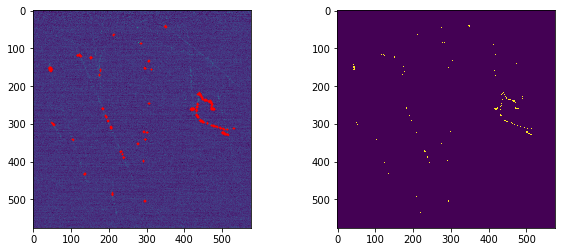

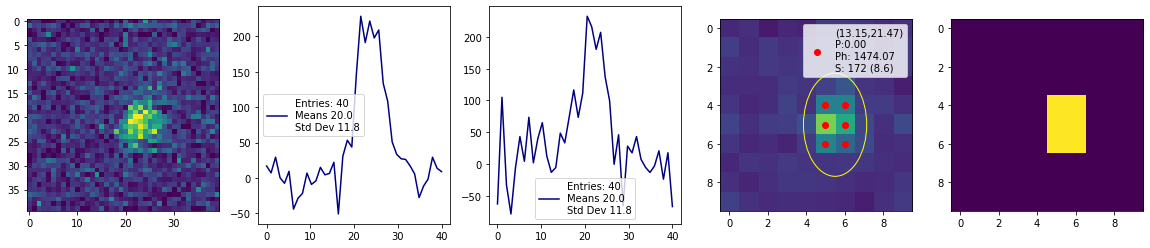

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered i

>>>> Processing RUN:  4039 Event:  110


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 1585 73
Elapsed time: 188.0
['iTr: 110.00', 'cluster_lable: 73.00', 'pixels: 442.00', 'photons: 3485.14', 'ph_pixels: 7.88', 'x0start: 932.00', 'y0start: 2056.00', 'x0end: 932.00', 'y0end: 2068.00', 'width: 30.09', 'height: 23.09', 'pearson: -0.11']


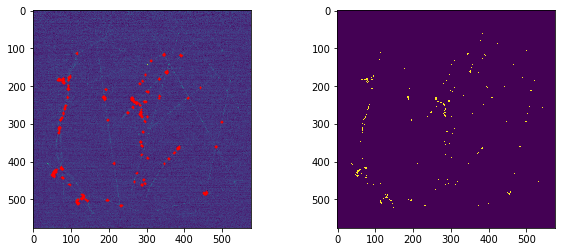

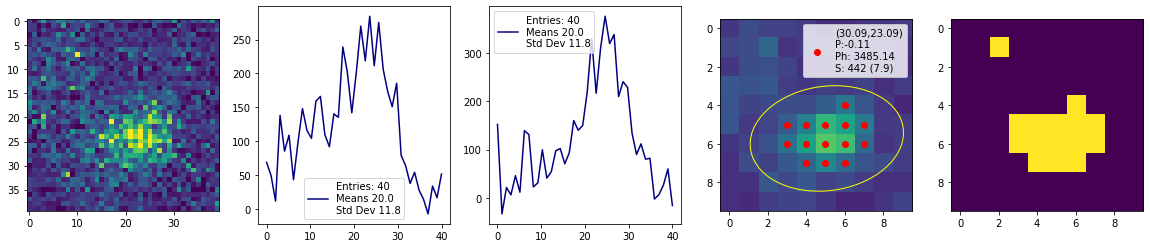

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_

>>>> Processing RUN:  4039 Event:  120


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 2520 102
Elapsed time: 162.2
['iTr: 120.00', 'cluster_lable: 102.00', 'pixels: 185.00', 'photons: 1029.90', 'ph_pixels: 5.57', 'x0start: 648.00', 'y0start: 2164.00', 'x0end: 652.00', 'y0end: 2172.00', 'width: 20.55', 'height: 15.18', 'pearson: 0.29']


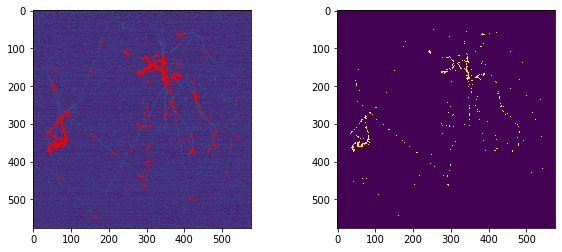

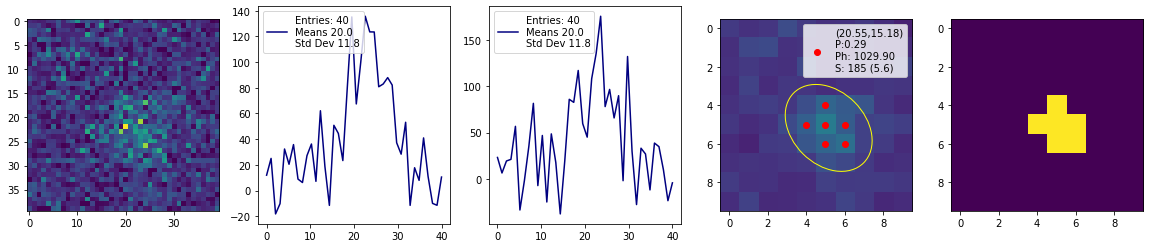

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: inval

>>>> Processing RUN:  4039 Event:  130


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 1252 61
Elapsed time: 180.5
['iTr: 130.00', 'cluster_lable: 61.00', 'pixels: 221.00', 'photons: 1500.86', 'ph_pixels: 6.79', 'x0start: 1192.00', 'y0start: 2028.00', 'x0end: 1200.00', 'y0end: 2036.00', 'width: 22.22', 'height: 17.57', 'pearson: 0.23']


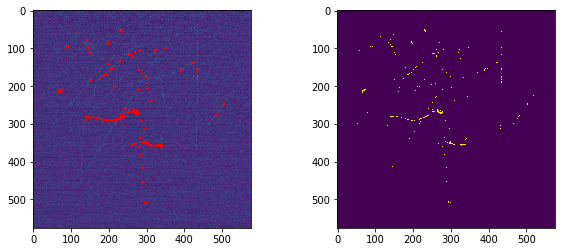

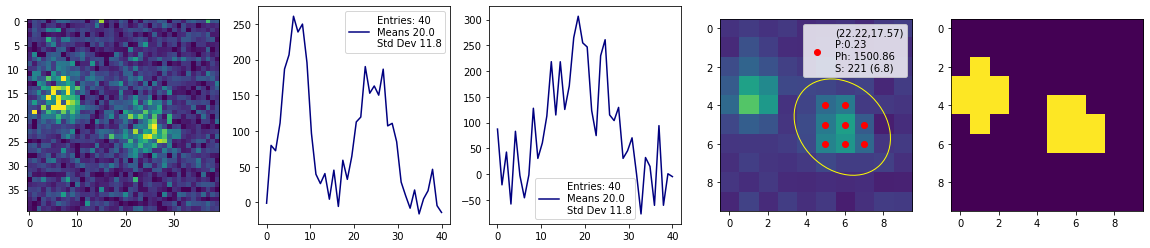

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


>>>> Processing RUN:  4039 Event:  140


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 2907 140
Elapsed time: 190.8
['iTr: 140.00', 'cluster_lable: 140.00', 'pixels: 307.00', 'photons: 1975.18', 'ph_pixels: 6.43', 'x0start: 1040.00', 'y0start: 2052.00', 'x0end: 1044.00', 'y0end: 2064.00', 'width: 17.08', 'height: 28.18', 'pearson: -0.11']


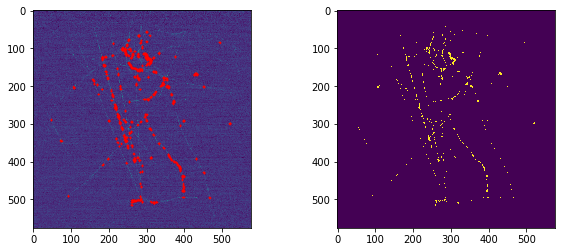

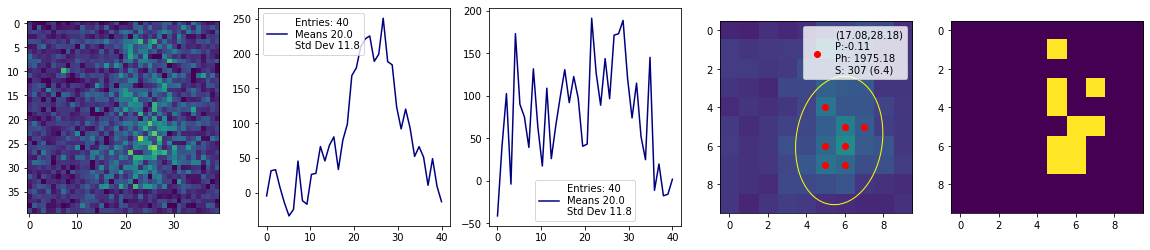

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launche

>>>> Processing RUN:  4039 Event:  150


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


DEBUG: number of points, clusters: 2060 104
Elapsed time: 189.8
['iTr: 150.00', 'cluster_lable: 104.00', 'pixels: 257.00', 'photons: 1737.82', 'ph_pixels: 6.76', 'x0start: 1148.00', 'y0start: 2064.00', 'x0end: 1156.00', 'y0end: 2072.00', 'width: 26.43', 'height: 16.64', 'pearson: 0.21']


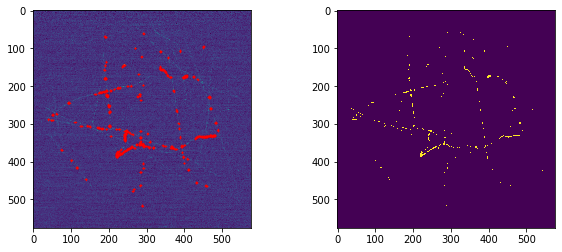

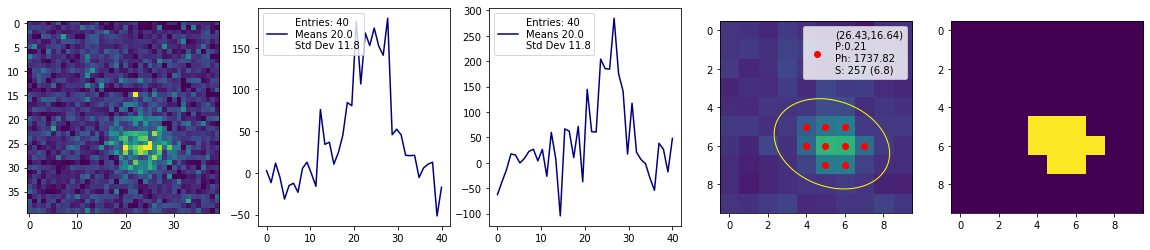

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


>>>> Processing RUN:  4039 Event:  160


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])


DEBUG: number of points, clusters: 1121 68
Elapsed time: 179.1
['iTr: 160.00', 'cluster_lable: 68.00', 'pixels: 335.00', 'photons: 1907.35', 'ph_pixels: 5.69', 'x0start: 1172.00', 'y0start: 2008.00', 'x0end: 1176.00', 'y0end: 2028.00', 'width: 19.53', 'height: 28.66', 'pearson: 0.32']


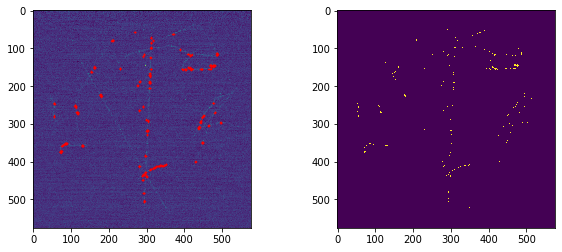

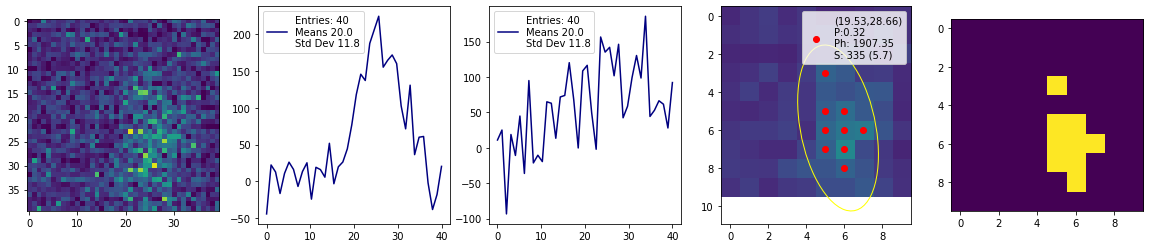

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars
/s3/mazzitel/cygno_cloud/cygnus_lib.py:445: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
######################## INIT ###############################
runI          = [4184, 4176, 4168, 4160, 4152, 4144, 4136, 4128, 4120] #3957 4061
runI          = [4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047]
run_ped       = 4038 #4183 #3965 #4062
#run_ped       = 4020
cimax         = 500
cimin         = 0 
tag           = 'LAB'
nsigma        = 1.5 
fast          = True
doRescale     = True
###############################################################
cfile = cy.open_(runI[0], tag=tag, posix=posix, verbose=False)
if cfile.x_resolution == 2048:
    rescale = 512 # orca flash
else:
    rescale = 576 #fusion


if not doRescale: 
    rescale = cfile.x_resolution
    eps=5
    min_samples = 40
    
else:
    eps=2
    min_samples = 5
tscale = int(cfile.x_resolution/rescale)
print("rascale: ", tscale)

################################################################
debug         = False
columns = ["iTr", "cluster_lable", "pixels", "photons", "ph_pixels", "x0start", "y0start", 
          "x0end", "y0end", "width", "height", "pearson"]


######################### Load PED #############################

m_image, s_image = cy.ped_(run_ped, path=mybasepath+'ped/')

#########################

th_image   = np.round(m_image + nsigma*s_image)
print ("light over Th: %.2f " % (th_image.sum()-m_image.sum()))

start_time = time.time()
# loop sui fle da analizaare
for nRi in range(len(runI)):
    try:
        # open file
        cfile = cy.open_(runI[nRi], tag=tag, posix=posix, verbose=True)
    except:
        print ('Problem in open file: ', runI[nRi])
        break
    #
    # crea un db vuoto da riempire 
    df = pd.DataFrame(columns = columns)
    # crea nome file di output
    file_out = (mybasepath+"out/dbscan_run%d_cmin_%d_cmax_%d_rescale_%d_nsigma_%.1f_ev_%d_ped_%d.plk.gz" % 
                (runI[nRi], cimin, cimax, rescale, nsigma, cfile.max_image, run_ped))
    #
######## main loop sulle imagini da analizzare ###########
    for iTr in range(0, cfile.max_image): # cfile.max_image
        if iTr % 10 == 0: 
          # running & debug ...
          print ('>>>> Processing RUN: ', runI[nRi], 'Event: ', iTr)
          # end 

        image = rtnp.hist2array(cfile.file.Get(cfile.pic[iTr])).T
        raw_image       = (image-m_image)
        rebin_image     = cy.rebin(raw_image, (rescale, rescale))  
        rebin_th_image  = cy.rebin((th_image-m_image), (rescale, rescale))
        edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)         
        points          = np.array(np.nonzero(edges)).T.astype(float) 
        
        # X_scaled        = StandardScaler().fit_transform(cy.poit_3d(points, rebin_image)) # 3D
        # dbscan          = DBSCAN(eps=0.045, min_samples = 20).fit(X_scaled) # eps=0.08 per 3D 0.04 2D
        
        dbscan          = DBSCAN(eps=eps, min_samples = min_samples).fit(points) 
        clusters        = dbscan.labels_
        n_points      = len(clusters>-1)
        
        for ic in range (min(clusters), max(clusters)+1):
            ph = 0.
            yc = points[:,0][clusters==ic]
            xc = points[:,1][clusters==ic]
            
            if fast:
                zx1 = int(xc.mean() - 5*xc.std())
                zx2 = int(xc.mean() + 5*xc.std())
                zy1 = int(yc.mean() - 5*yc.std())
                zy2 = int(yc.mean() + 5*yc.std())

                izoom = raw_image[zy1*tscale:zy2*tscale,zx1*tscale:zx2*tscale]            
                width, height, pearson, ph, dim = cy.confidence_ellipse_par((xc-zx1)*tscale, (yc-zy1)*tscale, 
                                                                            image = izoom)
            else:
            #
            # attenzine NORMALIZZAZIONE per per rscale
            #
                ph, dim = cy.cluster_par(xc, yc, rebin_image) 
                width, height, pearson, _, _ = cy.confidence_ellipse_par(xc,yc)
                ph     = ph*tscale*tscale
                dim    = dim*tscale*tscale
                width  = width*tscale
                height = height*tscale            

            for j in range(0, xc.shape[0]):
                x=int(xc[j])
                y=int(yc[j])
                #ph += rebin_image[y,x]
                if j == 0:
                    x0start = x*tscale
                    y0start = y*tscale
            x0end = x*tscale
            y0end = y*tscale


            
            # 
            # salva info per ogni cluster
            #
            df = df.append({columns[0]:iTr, columns[1]:ic, columns[2]:dim, columns[3]:ph, columns[4]:ph/dim, 
                            columns[5]:x0start, columns[6]:y0start, columns[7]:x0end, columns[8]:y0end, 
                            columns[9]:width, columns[10]:height, columns[11]:pearson},
                            ignore_index=True)
########### Debug  #####################################
        if iTr % 10 == 0 or debug:
            print ("DEBUG: number of points, clusters: " +str(n_points), ic) 
            print ("Elapsed time: {:.1f}".format(time.time() - start_time))
            print ([str(columns[i])+': {:.2f}'.format(x) for i, x in enumerate (df.tail(1).values[0])])
            fig, ax = plt.subplots(1,2, figsize=(10,4))
            ax[0].imshow(rebin_image, vmin=-5, vmax=30)
            yc = points[:,0][clusters>-1]
            xc = points[:,1][clusters>-1]
            ax[0].plot(xc,yc, 'r.', markersize=1, label="ic"+str(ic))
            ax[1].imshow(edges)
            plt.show()
            fig, ax = plt.subplots(1,5, figsize=(20,4))
            
            #ic = 0
            yc = points[:,0][clusters==ic]
            xc = points[:,1][clusters==ic]

            dd  = int (20/tscale)
            zx1 = int(xc.mean() - dd)
            zx2 = int(xc.mean() + dd)
            zy1 = int(yc.mean() - dd)
            zy2 = int(yc.mean() + dd)
            izoom = image[zy1*tscale:zy2*tscale,zx1*tscale:zx2*tscale]-m_image[zy1*tscale:zy2*tscale,zx1*tscale:zx2*tscale]
            ax[0].imshow(izoom, vmin=-5, vmax=30)
            py = np.sum(izoom, axis=0)
            px = np.sum(izoom, axis=1)
            x = np.linspace(0, py.size, py.size)
            ax[1].plot(x,py, "navy", label='Entries: {:d}\nMeans {:.1f}\nStd Dev {:.1f}'.format(x.size, x.mean(), x.std()))
            ax[2].plot(x,px, "navy", label='Entries: {:d}\nMeans {:.1f}\nStd Dev {:.1f}'.format(x.size, x.mean(), x.std()))

            ax[3].imshow(rebin_image[zy1:zy2,zx1:zx2], vmin=-5, vmax=30)
            el_plt, el_par = cy.confidence_ellipse(xc-zx1, yc-zy1, ax[3], edgecolor='yellow')
            ax[3].scatter(xc-zx1, yc-zy1, color='red', label = ('(%.2f,%.2f)\nP:%.2f\nPh: %.2f\nS: %d (%.1f)' %
                                    (width, height, pearson, ph, dim, ph/dim)))
            ax[4].imshow(edges[zy1:zy2,zx1:zx2])
            ax[1].legend()
            ax[2].legend()
            ax[3].legend()
            plt.show()
            start_time = time.time()
#################### close and save ################
    df.to_pickle(file_out, compression='gzip')
    print ("out file", file_out)

# debug and test

number of points, closters: 3698 212
199 212 224 2217.7149999999997 9.90051339285714 1644 2156 1652 2176 28.215786178439842 28.103199066507695 0.33805931700163894


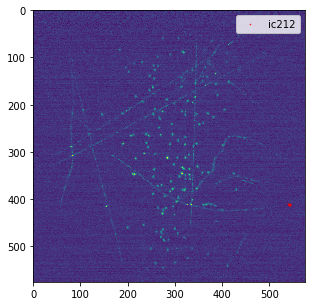

In [71]:
print ("number of points, closters: " +str(n_points), ic)
print(iTr, ic, dim, ph, ph/dim,x0start,y0start,x0end, y0end, width, height,pearson)
fig = plt.figure(figsize=(5,5))
plt.imshow(rebin_image, vmin=-5, vmax=30)
yc = points[:,1][clusters==ic]
xc = points[:,0][clusters==ic]
plt.plot(xc,yc, 'r.', markersize=1, label="ic"+str(ic))
plt.legend()
plt.show()

199 10 9 70.2828125 5.535860485151752 5.709493825455716 0.0944911182523068
199 10 144 1124.525 22.14344194060701 22.837975301822866 0.0944911182523068


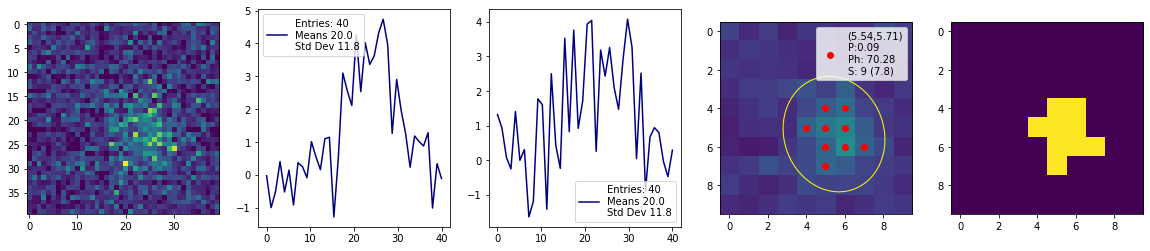

In [72]:
fig, ax = plt.subplots(1,5, figsize=(20,4))
ic = 10
yc = points[:,0][clusters==ic]
xc = points[:,1][clusters==ic]

dd = 20/tscale
zx1 = int(xc.mean() - dd)
zx2 = int(xc.mean() + dd)
zy1 = int(yc.mean() - dd)
zy2 = int(yc.mean() + dd)
#izoom = image[zy1*tscale:zy2*tscale,zx1*tscale:zx2*tscale]-m_image[zy1*tscale:zy2*tscale,zx1*tscale:zx2*tscale]
izoom = raw_image[zy1*tscale:zy2*tscale,zx1*tscale:zx2*tscale]
ax[0].imshow(izoom, vmin=-5, vmax=30)
py = np.mean(izoom, axis=0)
px = np.mean(izoom, axis=1)
x = np.linspace(0, py.size, py.size)
ax[1].plot(x,py, "navy", label='Entries: {:d}\nMeans {:.1f}\nStd Dev {:.1f}'.format(x.size, x.mean(), x.std()))
ax[2].plot(x,px, "navy", label='Entries: {:d}\nMeans {:.1f}\nStd Dev {:.1f}'.format(x.size, x.mean(), x.std()))

ax[3].imshow(rebin_image[zy1:zy2,zx1:zx2], vmin=-5, vmax=30)


_, _ = cy.confidence_ellipse(xc-zx1, yc-zy1, ax[3], edgecolor='yellow')

ph, dim = cy.cluster_par(xc, yc, rebin_image)
width, height, pearson, _, _ = cy.confidence_ellipse_par(xc, yc)
ax[3].scatter(xc-zx1, yc-zy1, color='red', label = ('(%.2f,%.2f)\nP:%.2f\nPh: %.2f\nS: %d (%.1f)' %
                                    (width, height, pearson, ph, dim, ph/dim)))
ax[4].imshow(edges[zy1:zy2,zx1:zx2])

print(iTr, ic, dim, ph, width, height, pearson)

ph = ph*tscale*tscale
dim = dim*tscale*tscale
width = width*tscale
height = height*tscale
print(iTr, ic, dim, ph, width, height, pearson)


ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()


In [80]:
def n_std_rectangle(x, y, ax, image = np.array([]), n_std=3.0, facecolor='none', **kwargs):
    from matplotlib.patches import Rectangle
    mean_x = x.mean()
    mean_y = y.mean()
    std_x = x.std()
    std_y = y.std()
    half_width = n_std * std_x
    half_height = n_std * std_y
    if image.any():
        rimage = image*0
        xs = int(mean_x - half_width)+1
        xe = int(mean_x + half_width)+1
        ys = int(mean_y - half_height)+1
        ye = int(mean_y + half_height)+1
        # print(ys,ye, xs,xe)
        rimage[ys:ye, xs:xe]=image[ys:ye, xs:xe]
        # print (rimage)
        # print(rimage.sum())
        
    rectangle = Rectangle(
        (mean_x - half_width, mean_y - half_height),
        2 * half_width, 2 * half_height, facecolor=facecolor, **kwargs)
    return ax.add_patch(rectangle), rimage  

def confidence_ellipse(x, y, ax, image = np.array([]), n_std=3.0, facecolor='none', **kwargs):
    from matplotlib.patches import Ellipse
    import matplotlib.transforms as transforms
    import numpy as np

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    if image.any():
        # ellsisse e' (x-x0)**2/a**2 + (y-y0)**2/b**2 < 1
        # print (mean_x, mean_y, ell_radius_x*scale_x, ell_radius_y*scale_y)
        rimage = image*0
        ar = abs(pearson)
        for x in range(image.shape[1]):
            for y in range(image.shape[0]):
                xr = (y-mean_y)*np.sin(ar)+(x-mean_x)*np.cos(ar)
                yr = (y-mean_y)*np.cos(ar)-(x-mean_x)*np.sin(ar)
                if (xr)**2/(ell_radius_x*scale_x)**2 + (yr)**2/(ell_radius_y*scale_y)**2 < 1:
                    rimage[y,x]=image[y, x]
        # print (rimage)
        # print(rimage.sum())
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)

    return ax.add_patch(ellipse), rimage 


def confidence_ellipse_par(x, y, image = np.array([]), n_std=3.0, facecolor='none', **kwargs):
    import numpy as np

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
                           
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
                           
    width=scale_x*ell_radius_x * 2 
    height=scale_y*ell_radius_y * 2              
    if image.any():
        # ellsisse e' (x-x0)**2/a**2 + (y-y0)**2/b**2 < 1
        # print (mean_x, mean_y, ell_radius_x*scale_x, ell_radius_y*scale_y)
        rimage = image*0
        ar = abs(pearson)
        for x in range(image.shape[1]):
            for y in range(image.shape[0]):
                xr = (y-mean_y)*np.sin(ar)+(x-mean_x)*np.cos(ar)
                yr = (y-mean_y)*np.cos(ar)-(x-mean_x)*np.sin(ar)
                if (xr)**2/(ell_radius_x*scale_x)**2 + (yr)**2/(ell_radius_y*scale_y)**2 < 1:
                    rimage[y,x]=image[y, x]
        # print (rimage)
        # print(rimage.sum())
    else:
        rimage = np.array([])

    
    return width, height, pearson, rimage.sum(), np.size(rimage[rimage>0])


scaled ph: 1124.5 dim: 144
real sq ph 1242.5 dim: 162
real el ph 1746.7 dim: 298
1280
(22.143441940607005, 22.837975301822866, 0.09449111825230681, 1746.67, 298)


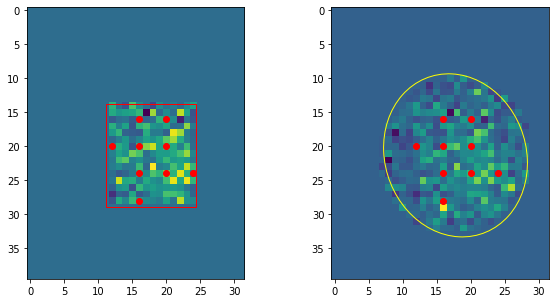

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

zx1 = int(xc.mean() - 5*xc.std())
zx2 = int(xc.mean() + 5*xc.std())
zy1 = int(yc.mean() - 5*yc.std())
zy2 = int(yc.mean() + 5*yc.std())
#izoom = image[zy1*tscale:zy2*tscale,zx1*tscale:zx2*tscale]-m_image[zy1*tscale:zy2*tscale,zx1*tscale:zx2*tscale]
izoom = raw_image[zy1*tscale:zy2*tscale,zx1*tscale:zx2*tscale]

ph, dim = cy.cluster_par(xc, yc, rebin_image)
print ("scaled ph: {:.1f} dim: {:d}".format(ph*tscale*tscale, dim*tscale*tscale))

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(izoom, vmin=-5, vmax=30)
_, rimage1 = cy.n_std_rectangle((xc-zx1)*tscale, (yc-zy1)*tscale, ax[0], edgecolor='red', image=izoom,n_std=2.0)
ax[0].scatter((xc-zx1)*tscale, (yc-zy1)*tscale, color='red')
ax[0].imshow(rimage1)
print ("real sq ph {:.1f} dim: {:d}".format(rimage1.sum(), np.size(rimage1[rimage1>0])))
ax[1].imshow(izoom, vmin=-5, vmax=30)
_, rimage2 = cy.confidence_ellipse((xc-zx1)*tscale, (yc-zy1)*tscale, ax[1], edgecolor='yellow',image=izoom, n_std=3.0)
print ("real el ph {:.1f} dim: {:d}".format(rimage2.sum(), np.size(rimage2[rimage2>0])))
print(np.size(rimage2))
ax[1].imshow(rimage2)
ax[1].scatter((xc-zx1)*tscale, (yc-zy1)*tscale, color='red')

print(cy.confidence_ellipse_par((xc-zx1)*tscale, (yc-zy1)*tscale, image = izoom))

plt.show()

In [85]:
%timeit  cy.confidence_ellipse_par((xc-zx1)*tscale, (yc-zy1)*tscale, image = izoom)

19.9 ms ± 5.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [86]:
def di2(xc, yc, rebin_image):
    cy.cluster_par(xc, yc, rebin_image) 
    cy.confidence_ellipse_par(xc,yc)
%timeit di2(xc, yc, rebin_image)

109 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


[[2.1 2.2]
 [3.1 3.2]]
[[0.  0.  0.  0. ]
 [0.  2.1 2.2 0. ]
 [0.  3.1 3.2 0. ]
 [0.  0.  0.  0. ]]


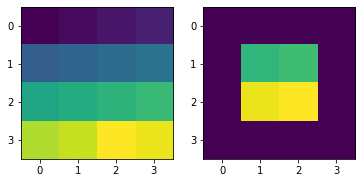

In [8]:
a = np.array([[1.0,1.1,1.2, 1.3], [2.0,2.1,2.2,2.3], [3.0,3.1,3.2,3.3], [4.0,4.1,4.4,4.3]])
b = a*0.

print (a[1:3, 1:3])
b[1:3, 1:3]=a[1:3, 1:3]
print (b)
fig, ax = plt.subplots(1,2)
ax[0].imshow(a)
ax[1].imshow(b)
plt.show()

# analisi

In [48]:
#
# carica i dati dal file
#
VarNames=["iTr", "cluster_lable", "pixels", "photons", "ph_pixels", "x0start", "y0start", 
          "x0end", "y0end", "width", "height", "pearson"]

#C_file = 'https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/dbscan_run2359_cmin_0_cmax_300_rescale_576_nsigma_1.5_ev_1000_ped_2358.txt'
#df = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)
try: 
    print("file"+file_out)
except NameError:
    file_out=mybasepath+"out/dbscan_run3957_cmin_0_cmax_500_rescale_2048_nsigma_1.5_ev_100_ped_3965.plk.gz"
    print("file"+file_out)
file_out=mybasepath+"out/dbscan_run3957_cmin_0_cmax_500_rescale_2048_nsigma_2.0_ev_100_ped_3965.plk.gz"

#file_out=mybasepath+"out/dbscan_run3957_cmin_0_cmax_500_rescale_512_nsigma_1.5_ev_100_ped_3965.plk.gz"
df = pd.read_pickle(file_out, compression='gzip')

# range
# charge distribution
# charge asimettriy

df['length'] = np.sqrt((df['x0end'] - df['x0start'])**2 + (df['y0end'] - df['y0start'])**2)
df['x0c'] = (df['x0end'] + df['x0start'])/2.
df['y0c'] = (df['y0end'] + df['y0start'])/2.
df = df[(df['cluster_lable'] > -1) & (df['width'] > 0) & (df['height'] > 0)]

file/workarea/cloud-storage/mazzitel/out/dbscan_run4184_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz


In [49]:
df

iTr  cluster_lable  pixels  photons  ph_pixels  x0start  y0start  \
1       0.0            0.0   302.0  1255.30   4.156623    569.0    678.0   
2       0.0            1.0   272.0  1380.18   5.074191    950.0    715.0   
3       0.0            2.0   255.0  1197.35   4.695490   1389.0    733.0   
4       0.0            3.0   325.0  2089.41   6.428954    818.0    804.0   
5       0.0            4.0   299.0  1750.01   5.852876   1735.0    821.0   
...     ...            ...     ...      ...        ...      ...      ...   
11174  99.0           97.0   246.0  1281.35   5.208740   1478.0   1644.0   
11175  99.0           98.0   204.0   928.97   4.553775   1621.0   1667.0   
11176  99.0           99.0   437.0  2576.72   5.896384   1320.0   1686.0   
11177  99.0          100.0   300.0  1430.06   4.766867    814.0   1786.0   
11178  99.0          101.0   260.0  1262.06   4.854077   1067.0   1838.0   

        x0end   y0end      width     height   pearson     length     x0c  \
1       567.0   689.0  24.441281  18.467426 -0.100873  11.180340   568.0   
2       957.0   730.0  21.985324  20.518196 -0.076855  16.552945   953.5   
3      1384.0   749.0  18.780050  23.559121 -0.116497  16.763055  1386.5   
4       820.0   823.0  22.748394  24.425927 -0.008475  19.104973   819.0   
5      1740.0   839.0  20.530386  25.787957 -0.093072  18.681542  1737.5   
...       ...     ...        ...        ...       ...        ...     ...   
11174  1480.0  1658.0  16.120323  25.259304 -0.335523  14.142136  1479.0   
11175  1628.0  1679.0  19.994139  16.926348  0.020101  13.892444  1624.5   
11176  1321.0  1709.0  21.396490  33.661619 -0.053449  23.021729  1320.5   
11177   817.0  1801.0  27.315851  19.474437  0.073968  15.297059   815.5   
11178  1075.0  1854.0  21.472853  21.169873 -0.103458  17.888544  1071.0   

          y0c  
1       683.5  
2       722.5  
3       741.0  
4       813.5  
5       830.0  
...       ...  
11174  1651.0  
11175  1673.0  
11176  1697.5  
11177  1793.5  
11178  1846.0  

[11079 rows x 15 columns]

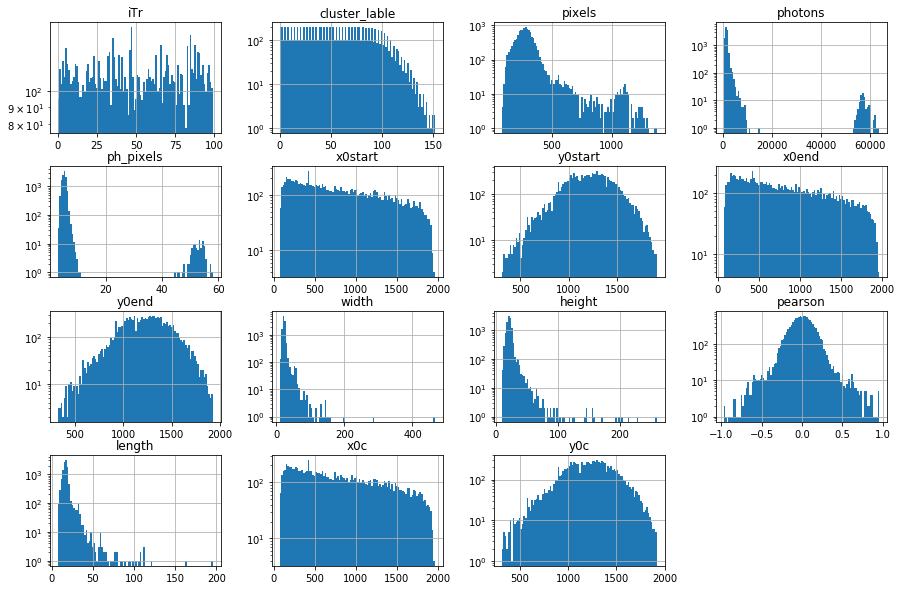

In [50]:
#
# Visulizza tutte le Varibili
#
df.hist(bins=100, figsize=(15,10), log=True)
plt.show()

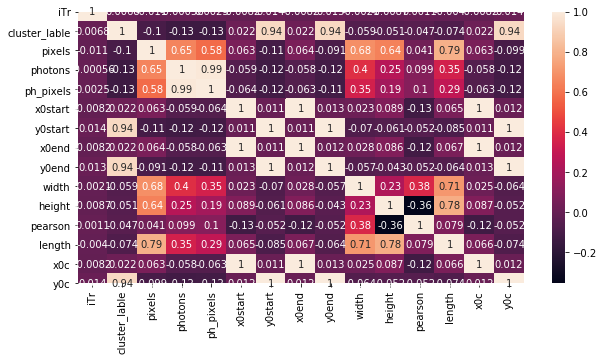

In [51]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

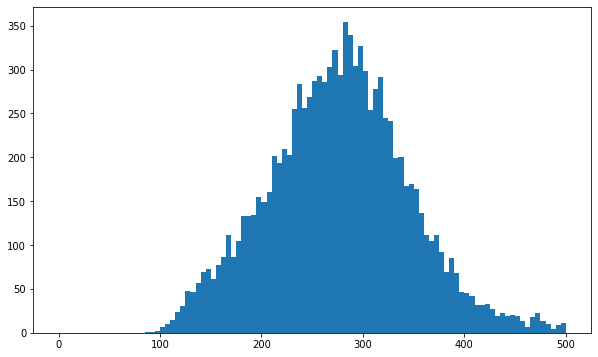

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df.pixels, 100, range=(0,500))
#ax.set_yscale('log')
plt.show()

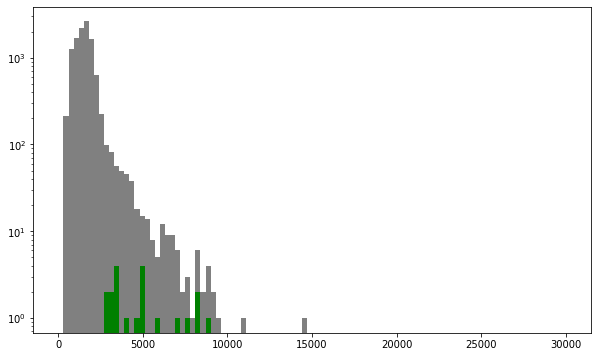

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df.photons, 100, range=(0,30000), color="gray")
ax.hist(df.photons[df.pearson>0.8], 100, range=(0,30000), color="green")
ax.set_yscale('log')
plt.show()

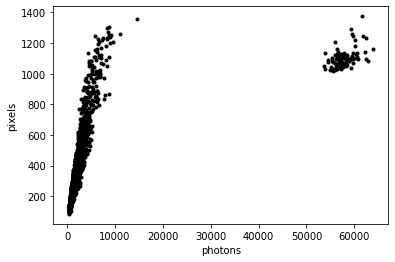

In [54]:
plt.plot(df.photons.values, df.pixels.values, 'k.')
plt.xlabel('photons')
plt.ylabel('pixels')
plt.show()

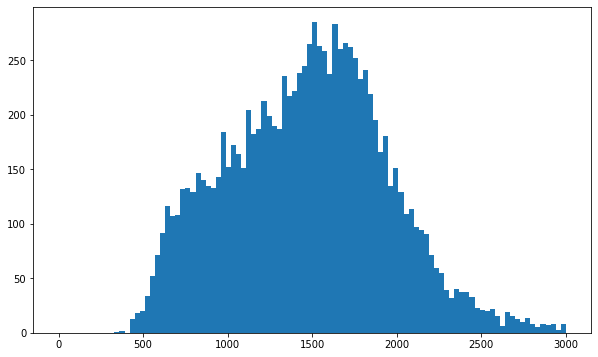

In [55]:
#
# Visualizziamo i fotoni
#
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df.photons[(df.pixels>40) & (abs(df.pearson)<0.5)], 100, range=(0,3000))
plt.show()

Fidical Ellips: 100.00, 120.00 [mm]


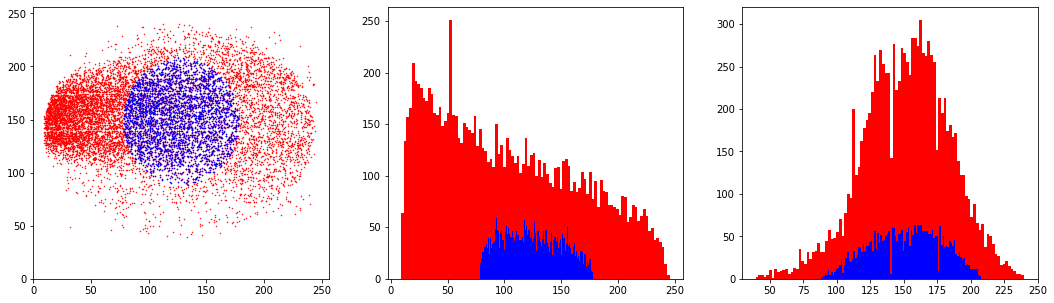

In [56]:
pd.set_option('mode.chained_assignment', None)
dfc = df[(df['cluster_lable'] > -1) & (df['width'] > 0) & (df['height'] > 0)]

# Normalization

phKev       = 2045.15/5.9
pixelscale  = 0.125 
x_resolution = y_resolution = 2048
xyscale = 1.
rescale_pixelscale = xyscale*pixelscale

dfc['photons']  =dfc['photons']*xyscale*xyscale
dfc['length']   =dfc['length']*rescale_pixelscale
dfc['x0c']      =dfc['x0c']*rescale_pixelscale
dfc['y0c']      =dfc['y0c']*rescale_pixelscale

# fiducializzation

DX = 0 
DY = -20
a = 100. # mm 
b = 120. # mm

a0 = a*0.5
b0 = b*0.5
#################################################


print ("Fidical Ellips: %.2f, %.2f [mm]" % (a,b))

d0 = x_resolution*pixelscale/2

fig, ax = plt.subplots(1,3, figsize=(18, 5))

y = dfc['y0c'].values
x = dfc['x0c'].values
x1 = x[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
y1 = y[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
ax[0].plot(x, y, 'r.', markersize=1)
ax[0].plot(x1, y1, 'b.', markersize=1)
ax[0].set_xlim(0,256)
ax[0].set_ylim(0,256)
ax[1].hist(x, color='r',bins=100)
ax[1].hist(x1, color='b',bins=100)
ax[2].hist(y, color='r',bins=100)
ax[2].hist(y1, color='b',bins=100)
plt.show()

dfc = dfc[((dfc['x0c']-d0)**2/a0**2 + (dfc['y0c']-d0)**2/b0**2 )< 1]

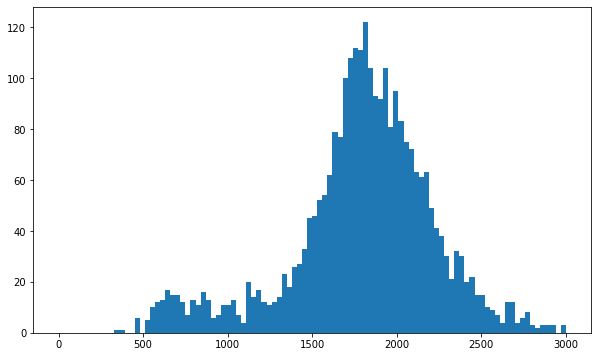

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(dfc.photons[(dfc.pixels>40) & (abs(dfc.pearson)<0.5)], 100, range=(0,3000))
plt.show()

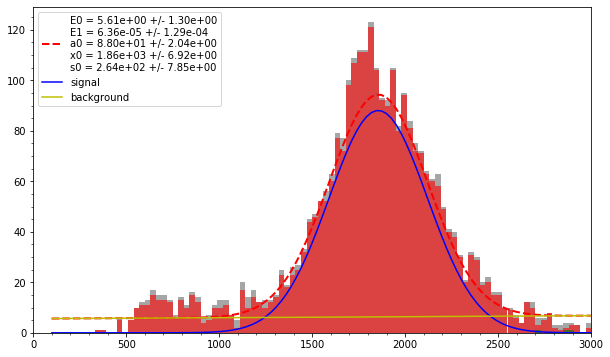

In [58]:
bins = 100

fig, ax = plt.subplots(figsize=(10,6))
hmax = 3000.
myExpG(dfc['photons'], ax, xmin=100., xmax=hmax, bins=100, E0=10000., E1=-0.001, a0=100., x0=2000., s0=300.)
ax.hist(dfc['photons'], bins=100, range=(0,hmax), color='gray', alpha=0.7)
ax.hist(dfc.photons[(dfc.pixels>40) & (abs(dfc.pearson)<0.3)], 100, range=(0,hmax), color="red", alpha=0.6)
ax.hist(dfc.photons[(dfc.pixels>40) & (abs(dfc.pearson)>0.8)], 100, range=(0,hmax), color="green", alpha=0.6)
ax.set_xlim(0,hmax)
#ax.set_yscale("log")
plt.legend(loc=2, prop={'size':'medium'})
plt.minorticks_on()
plt.show()

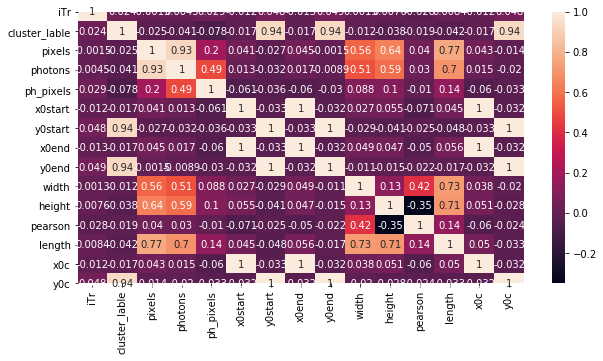

In [59]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.heatmap(dfc.corr(), annot=True)
plt.show()

In [60]:
258/1680

0.15357142857142858

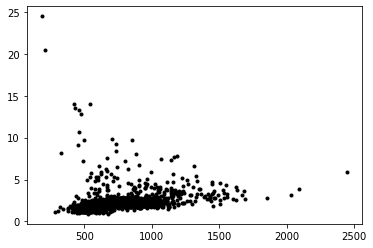

In [61]:
plt.plot(dfc.photons.values/dfc.length.values, dfc.length.values, 'k.')
plt.show()


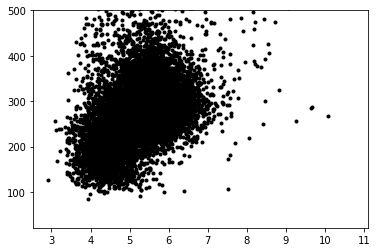

In [68]:
plt.plot(df.ph_pixels.values[df.photons<20000], df.pixels.values[df.photons<20000], 'k.')
plt.plot(df.ph_pixels.values[(df.pearson>0.8) & (df.photons<20000)], 
         df.pixels.values[(df.pearson>0.8) & (df.photons<20000)], 'r.')
plt.ylim(top=500)
plt.show()

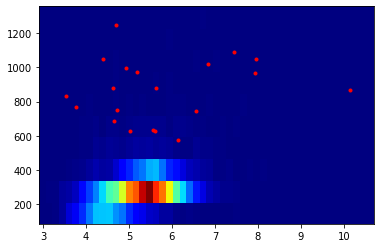

In [63]:
plt.hist2d(df.ph_pixels.values[df.photons<20000], df.pixels.values[df.photons<20000], bins=(50,10), cmap=plt.cm.jet)
plt.plot(df.ph_pixels.values[(df.pearson>0.8) & (df.photons<20000)], 
         df.pixels.values[(df.pearson>0.8) & (df.photons<20000)], 'r.')

plt.show()

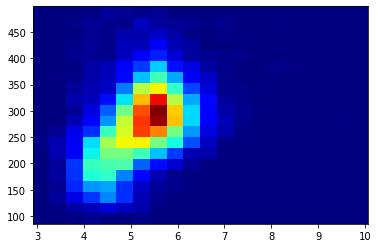

In [66]:
plt.hist2d(df.ph_pixels.values[(df.photons<20000) & (df.pixels<500)], 
           df.pixels.values[(df.photons<20000) & (df.pixels<500)], 
           bins=(20,20), cmap=plt.cm.jet)
plt.show()

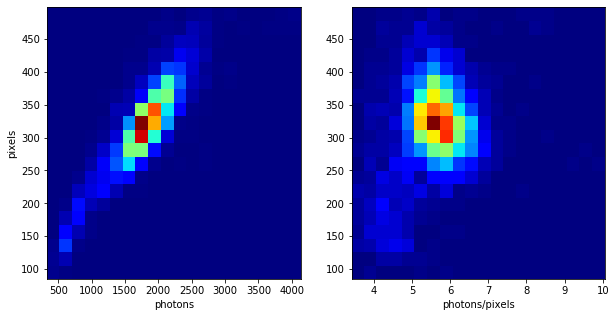

In [67]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist2d(dfc.photons.values[(dfc.pixels<500)], 
           dfc.pixels.values[(dfc.pixels<500)], 
           bins=(20,20), cmap=plt.cm.jet)
ax[0].set_xlabel("photons")
ax[0].set_ylabel("pixels")
ax[1].hist2d(dfc.ph_pixels.values[(dfc.pixels<500)], 
           dfc.pixels.values[(dfc.pixels<500)], 
           bins=(20,20), cmap=plt.cm.jet)
ax[1].set_xlabel("photons/pixels")
plt.show()

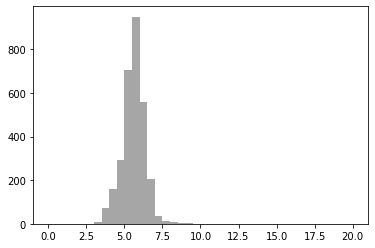

In [27]:
plt.hist(dfc['ph_pixels'], bins=40, range=(0,20), color='gray', alpha=0.7)
plt.show()